Mean Squared Error: 0.6536995137170021
R-squared: 0.8072059636181392


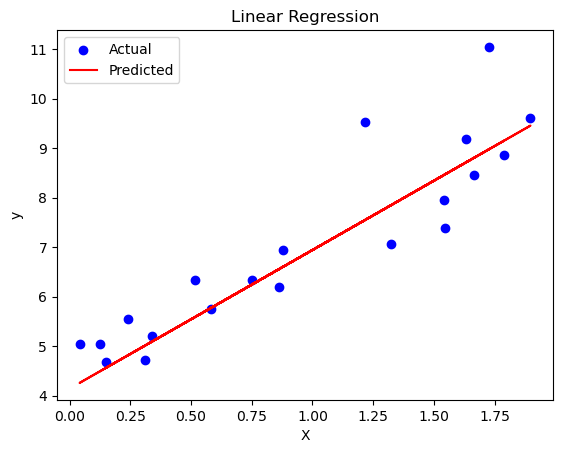

In [2]:
#Yi = ax_i + b
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate some random data for demonstration
# X will be the feature, and y will be the target (label)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions using the model on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the regression line and the data points
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


Intercept: 4.215096157546748
Slope: 2.7701133864384833


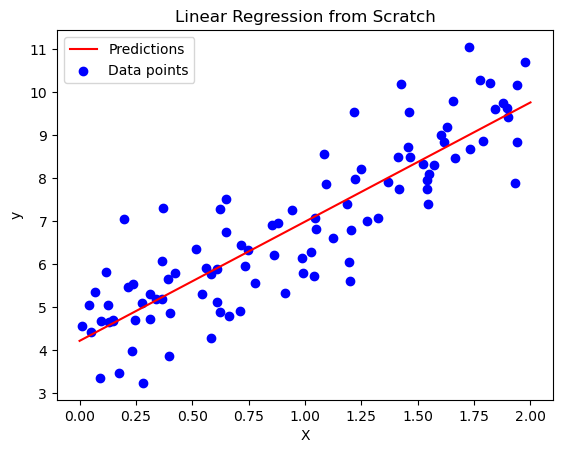

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data for demonstration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a bias term (intercept) to X by appending a column of ones
X_b = np.c_[np.ones((100, 1)), X]  # X_b is now [1, X] to account for theta_0 (intercept)

# Compute theta using the normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Display the learned parameters
print(f"Intercept: {theta_best[0][0]}")
print(f"Slope: {theta_best[1][0]}")

# Make predictions
X_new = np.array([[0], [2]])  # Two new data points for prediction
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add bias term
y_predict = X_new_b.dot(theta_best)

# Plotting the results
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.scatter(X, y, color="blue", label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression from Scratch")
plt.legend()
plt.show()


In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Sample data (X: feature, y: target)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([3, 4, 2, 5, 6, 7, 8, 9, 10, 12])

# Create the Linear Regression model
model = LinearRegression()

# Fit the model using the training data
model.fit(X, y)

# Get the model parameters (intercept and coefficient)
intercept = model.intercept_
slope = model.coef_[0]  # Only one slope because X has a single feature

# Print the intercept and slope
print(f"Intercept (θ0): {intercept}")
print(f"Slope (θ1): {slope}")

# Trying to access the second slope will cause an IndexError, so we handle it:
try:
    print(f"Slope (θ2): {model.coef_[1]}")
except IndexError:
    print("Error: There is only one feature, so model.coef_ contains only one coefficient.")


Intercept (θ0): 0.9999999999999991
Slope (θ1): 1.0181818181818183
Error: There is only one feature, so model.coef_ contains only one coefficient.


In [5]:
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

# Sample data (X: feature, y: target)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([3, 4, 2, 5, 6, 7, 8, 9, 10, 12])

# Step 1: Fit the model using LinearRegression
model = LinearRegression()
model.fit(X, y)
regression_slope = model.coef_[0]  # Slope from LinearRegression

# Step 2: Calculate the Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(X.flatten(), y)

# Step 3: Calculate the standard deviations of X and y
std_x = np.std(X, ddof=1)  # ddof=1 for sample standard deviation
std_y = np.std(y, ddof=1)

# Step 4: Calculate the slope using the correlation formula
calculated_slope = pearson_corr * (std_y / std_x)

# Display both the slopes
print(f"Slope from LinearRegression: {regression_slope}")
print(f"Slope from correlation formula: {calculated_slope}")

# Check if they are approximately equal
if np.isclose(regression_slope, calculated_slope):
    print("The slopes are approximately equal!")
else:
    print("The slopes are not equal.")


Slope from LinearRegression: 1.0181818181818183
Slope from correlation formula: 1.018181818181818
The slopes are approximately equal!


In [6]:
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

# Sample data (X: feature, y: target)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([3, 4, 2, 5, 6, 7, 8, 9, 10, 12])

# Step 1: Fit the model using LinearRegression
model = LinearRegression()
model.fit(X, y)
regression_slope = model.coef_[0]  # Slope from LinearRegression

# Step 2: Calculate the Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(X.flatten(), y)

# Step 3: Calculate the standard deviations of X and y
std_x = np.std(X, ddof=1)  # ddof=1 for sample standard deviation
std_y = np.std(y, ddof=1)

# Step 4: Calculate the slope using the correlation formula
calculated_slope = pearson_corr * (std_y / std_x)

# Step 5: Calculate predictions and RMSE
predictions = model.predict(X)
rmse = np.sqrt(np.mean((predictions - y) ** 2))

# Display both the slopes and RMSE
print(f"Slope from LinearRegression: {regression_slope}")
print(f"Slope from correlation formula: {calculated_slope}")
print(f"Root Mean Square Error (RMSE): {rmse}")

# Check if they are approximately equal
if np.isclose(regression_slope, calculated_slope):
    print("The slopes are approximately equal!")
else:
    print("The slopes are not equal.")


Slope from LinearRegression: 1.0181818181818183
Slope from correlation formula: 1.018181818181818
Root Mean Square Error (RMSE): 0.8290191356493087
The slopes are approximately equal!


In [8]:
import numpy as np
from scipy import stats

# Sample data (X: feature, y: target)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([3, 4, 2, 5, 6, 7, 8, 9, 10, 12])

# Step 1: Calculate the means
mean_x = np.mean(X)
mean_y = np.mean(y)

# Step 2: Calculate the slope (b1) and intercept (b0)
# Slope (b1) calculation
numerator = np.sum((X.flatten() - mean_x) * (y - mean_y))
denominator = np.sum((X.flatten() - mean_x) ** 2)
slope = numerator / denominator

# Intercept (b0) calculation
intercept = mean_y - slope * mean_x

# Step 3: Calculate predictions
predictions = intercept + slope * X.flatten()

# Step 4: Calculate RMSE
rmse = np.sqrt(np.mean((predictions - y) ** 2))

# Step 5: Calculate the Pearson correlation coefficient
pearson_corr, _ = stats.pearsonr(X.flatten(), y)

# Step 6: Calculate the standard deviations of X and y
std_x = np.std(X, ddof=1)  # ddof=1 for sample standard deviation
std_y = np.std(y, ddof=1)

# Step 7: Calculate the slope using the correlation formula
calculated_slope = pearson_corr * (std_y / std_x)

# Display the results
print(f"Slope from manual calculation: {slope}")
print(f"Intercept: {intercept}")
print(f"Slope from correlation formula: {calculated_slope}")
print(f"Root Mean Square Error (RMSE): {rmse}")

# Check if the calculated slope matches the slope from the correlation formula
if np.isclose(slope, calculated_slope):
    print("The slopes are approximately equal!")
else:
    print("The slopes are not equal.")


Slope from manual calculation: 1.018181818181818
Intercept: 1.0
Slope from correlation formula: 1.018181818181818
Root Mean Square Error (RMSE): 0.8290191356493092
The slopes are approximately equal!
